In [1]:
print('hello')

hello


In [2]:
import pickle
listClusters = pickle.load(open('for_clust_eval_listClusters.pkl', 'rb'))

In [3]:
listPrecurmass = pickle.load(open(r'for_clust_eval_listPrecurmass.pkl', 'rb'))

In [4]:
listClusters[0]['12'].mass


350.18438720703125

In [5]:
listClusters[0]['12'].content

{'sample': '12',
 'intensity': 29986.41015625,
 'intensity_rel': 0.00035503413372489244}

In [6]:
res = []
for idx, cluster in enumerate(listClusters):
    for value in cluster.values():
        if value.content:
            res.append((idx, value.mass, value.content['intensity']))

In [7]:
listClusters[0].values()

dict_values([350.18438720703125 > sample      : 12     > intensity   : 29986.41015625 > intensity_rel: 0.00035503413372489244, 350.18438720703125 > sample      : 16     > intensity   : 42560.140625 > intensity_rel: 0.00042573236152440493, 350.1844177246094 > sample      : 22     > intensity   : 53601.56640625 > intensity_rel: 0.0005619672203851301, 350.1844482421875 > sample      : 24     > intensity   : 31429.515625 > intensity_rel: 0.00042577560936838906, 350.1844787597656 > sample      : 5      > intensity   : 44411.9609375 > intensity_rel: 0.0006206174539477744, 350.1844787597656 > sample      : 14     > intensity   : 52666.4765625 > intensity_rel: 0.0006631083877214278, 350.18450927734375 > sample      : 19     > intensity   : 43746.19140625 > intensity_rel: 0.000577896372960502, 350.1845397949219 > sample      : 9      > intensity   : 18945.69140625 > intensity_rel: 0.00030420425617765, 350.1845397949219 > sample      : 10     > intensity   : 54642.203125 > intensity_rel: 0.00072

In [8]:
import pandas as pd
df = pd.DataFrame(res)

In [9]:
agg_df = df.groupby(0)[1].agg(['min', 'max','mean'])


In [21]:
agg_i_df = df.groupby(0)[2].agg(['min', 'max','mean'])
agg_i_df['min2avg'] = agg_i_df['mean'] - agg_i_df['min']
agg_i_df['avg2max'] =agg_i_df['max'] - agg_i_df['mean']
agg_i_df['dist'] =  agg_i_df.min2avg / agg_i_df.avg2max 
agg_i_df.sort_values('dist', inplace=True)

In [18]:
agg_i_df


,min,max,mean,min2avg,avg2max,dist
0,,,,,,
1293,2.600580e+06,5952660.50,4.586555e+06,1.985975e+06,1.366105e+06,-6.198695e+05
1423,1.715822e+06,4839977.50,3.519850e+06,1.804028e+06,1.320127e+06,-4.839010e+05
280,3.849344e+06,7529807.00,5.835091e+06,1.985747e+06,1.694716e+06,-2.910317e+05
903,4.359572e+06,7672248.50,6.122035e+06,1.762463e+06,1.550213e+06,-2.122495e+05
1426,9.445522e+05,2930200.75,2.024156e+06,1.079604e+06,9.060443e+05,-1.735600e+05
...,...,...,...,...,...,...
954,1.645146e+07,27767956.00,2.052450e+07,4.073031e+06,7.243461e+06,3.170430e+06
1158,3.441534e+07,62378176.00,4.671945e+07,1.230411e+07,1.565872e+07,3.354608e+06
265,4.380484e+05,21547626.00,8.448244e+06,8.010195e+06,1.309938e+07,5.089187e+06


In [10]:
agg_df['min2avg'] = agg_df['mean'] - agg_df['min']
agg_df['avg2max'] =agg_df['max'] - agg_df['mean']

In [11]:
agg_df['dist'] = agg_df.avg2max - agg_df.min2avg
agg_df.sort_values('dist', ascending = False, inplace=True)

In [12]:
agg_df

,min,max,mean,min2avg,avg2max,dist
0,,,,,,
1335,820.521484,820.525391,820.522432,0.000948,0.002959,0.002011
1681,1000.678833,1000.682312,1000.679629,0.000796,0.002683,0.001888
975,687.442261,687.445190,687.443023,0.000762,0.002168,0.001406
1129,749.530396,749.533386,749.531192,0.000796,0.002195,0.001399
1507,879.703247,879.705933,879.703937,0.000690,0.001996,0.001306
...,...,...,...,...,...,...
1623,926.806519,926.809448,926.808633,0.002115,0.000815,-0.001299
1075,727.572449,727.575684,727.574730,0.002281,0.000954,-0.001328
1707,1059.915283,1059.918701,1059.917732,0.002449,0.000969,-0.001481


In [ ]:
df_post = pd.DataFrame((e.precurmass, e.intensity) for e in listPrecurmass)

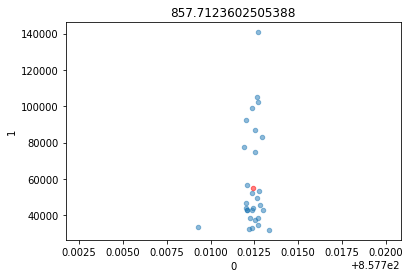

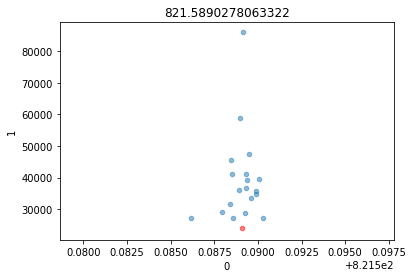

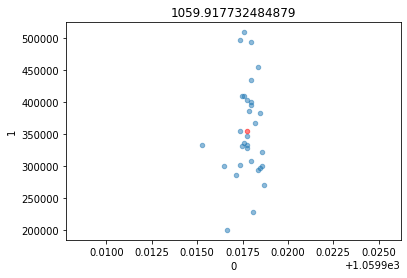

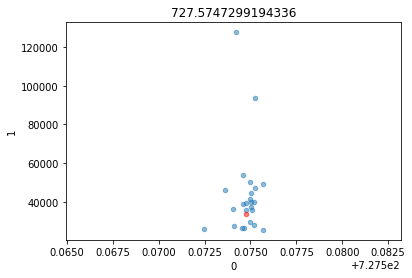

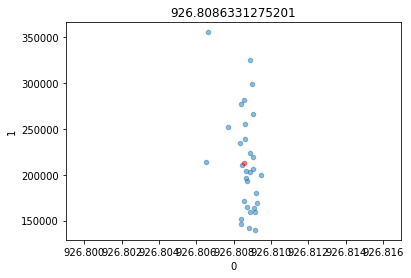

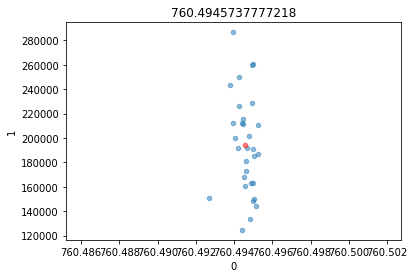

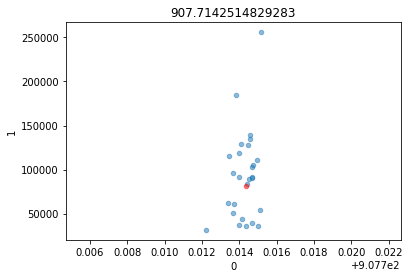

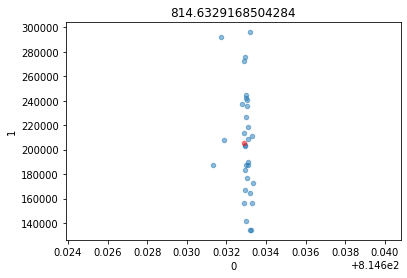

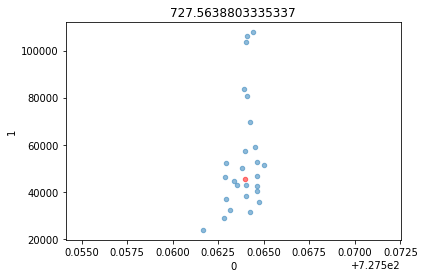

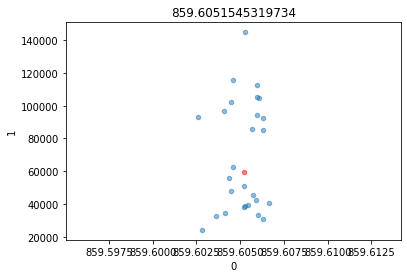

In [76]:
for target in agg_df.index[:10] :
    ax = df.loc[df[0] == target].plot.scatter(x=1,y=2, alpha=0.5, title =agg_df.loc[target]['mean'] )
    df_post.loc[[target]].plot.scatter(x=0,y=1, alpha=0.5, ax = ax, color='red')



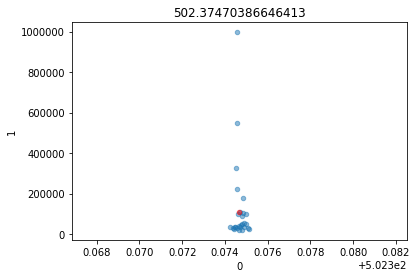

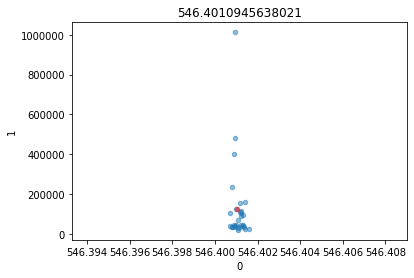

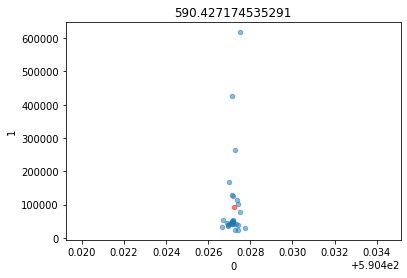

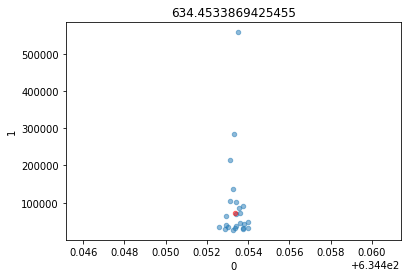

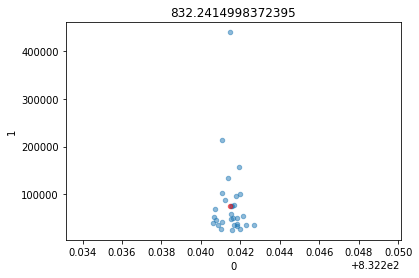

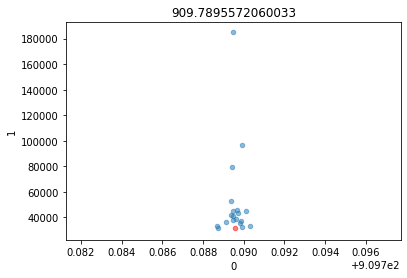

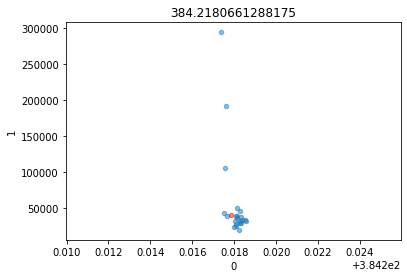

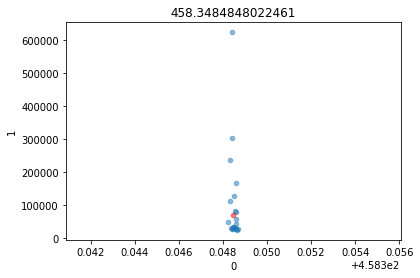

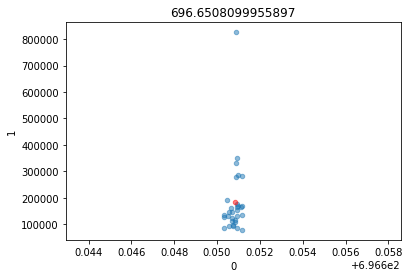

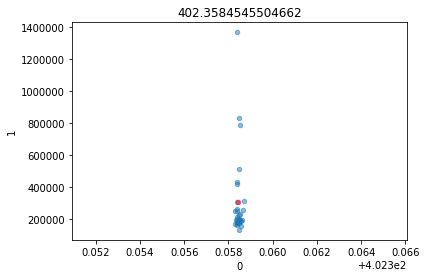

In [79]:
for target in agg_i_df.index[:10] :
    ax = df.loc[df[0] == target].plot.scatter(x=1,y=2, alpha=0.5, title =agg_df.loc[target]['mean'] )
    df_post.loc[[target]].plot.scatter(x=0,y=1, alpha=0.5, ax = ax, color='red')


In [78]:
agg_i_df

,min,max,mean,min2avg,avg2max,dist
0,,,,,,
466,20383.289062,9.967109e+05,124592.598235,104209.309172,872118.276765,0.119490
587,19882.458984,1.012552e+06,127717.105339,107834.646354,884834.394661,0.121870
714,24060.646484,6.175321e+05,98374.490706,74313.844221,519157.571794,0.143143
830,26851.949219,5.581356e+05,93697.120605,66845.171387,464438.441895,0.143927
1374,25320.580078,4.396426e+05,79008.643359,53688.063281,360633.950391,0.148871
...,...,...,...,...,...,...
339,109773.390625,2.788000e+05,218745.393649,108972.003024,60054.637601,1.814548
768,291051.406250,5.443806e+05,455487.901210,164436.494960,88892.661290,1.849832
1220,30382.294922,1.597668e+05,114632.865864,84250.570943,45133.962261,1.866678


# Now one with weighted intensity

In [114]:
import pickle
dictSpecEntries = pickle.load(open('alignment_3480','rb'))
listClusters = pickle.load(open('alignment_3511','rb'))

In [115]:
se_df = pd.DataFrame(((se.mass, se.content['intensity']) for se in dictSpecEntries['one']),columns='mass inty'.split())
se_df


,mass,inty
0,182.153184,670.195190
1,184.951112,1704.983765
2,185.041521,20205.226562
3,185.960924,875.142944
4,186.221132,755.729736
...,...,...
461,365.265901,28857.085938
462,365.286348,6797.064453
463,365.302671,2983.380432
464,365.319948,5240.211914


In [119]:
listClusters[0]['one']
lc_df = pd.DataFrame(((se['one'].mass, se['one'].content['intensity']) for se in listClusters),columns='mass inty'.split())
lc_df

,mass,inty
0,184.951101,1070.219889
1,185.041483,24860.453125
2,185.960817,1288.301682
3,186.220932,1655.929352
4,186.930396,2807.588715
...,...,...
83,365.302671,2983.380432
84,365.319873,5286.888733
85,365.360104,92128.189453
86,365.388294,1804.677083


In [122]:
se_df.loc[se_df.mass.between(185.031483, 185.051483)].mean()

mass      185.041496
inty    25329.225586
dtype: float64

In [123]:
#https://www.py4u.net/discuss/245208


In [131]:
idxs = []
for _, row in se_df.iterrows():
    idx = abs(lc_df.mass - row.mass).idxmin()
    idxs.append(idx)

In [142]:
se_df['c_mass'] = lc_df.loc[idxs].mass.to_numpy()
se_df['c_inty'] = lc_df.loc[idxs].inty.to_numpy()

In [145]:
sel = se_df.groupby('c_mass').agg({'mass':'mean', 'inty':'mean', 'c_inty':'first'})

In [148]:
(sel.c_inty / sel.inty).idxmax()


307.27126581890894

In [151]:
sel.loc[(sel.c_inty / sel.inty).idxmax()]

mass       309.449812
inty      1706.169467
c_inty    4217.266663
Name: 307.27126581890894, dtype: float64

In [172]:
se_df.query('307 < mass < 320')

,mass,inty,c_mass,c_inty
70,307.052339,551.774597,307.271266,4217.266663
71,307.271364,5221.920410,307.271266,4217.266663
72,315.304658,606.268555,307.271266,4217.266663
185,307.151185,369.599335,307.271266,4217.266663
186,307.186677,420.627472,307.271266,4217.266663
187,307.271266,4217.266663,307.271266,4217.266663
188,308.936098,554.101990,307.271266,4217.266663
189,312.629640,351.918427,307.271266,4217.266663
190,318.759950,389.155823,328.894138,1167.747945
318,307.271181,4162.935059,307.271266,4217.266663
